In [1]:
# Промежуточная аттестация 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1-й вариант: через git clone
# !git clone https://github.com/ShaoYoung/Innopolis/blob/main/dataset_tk.csv
# 2-й вариант: по прямой ссылке с GitHub
# url - ссылка на файл в моём репозитории на GitHub
# не работает. ParseError.
# url = 'https://github.com/ShaoYoung/Innopolis/blob/main/dataset_tk.csv'
# работает. нужен raw.
url = 'https://raw.githubusercontent.com/ShaoYoung/Innopolis/main/dataset_tk.csv'

In [3]:
df = pd.read_csv(url)

In [4]:
# можно просмотреть весь столбец / df, если изменить настройки
#specify that all rows should be shown
# pd.set_option('display.max_rows', None)
# df['DNH'] # будут выведены все строки
# pd.reset_option('display.max_rows')
df

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3


In [5]:
# Формат и количество значений.
df.info()
# Столбец 'Unnamed: 0' лучше переименовать и преобразовать к типу date
# Все столбцы хранят данные типа float64, тип NaN (отстутвие данных) не обнаружен. В использовании dropna() или fillna() нет необходимости.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         503 non-null    object 
 1   Punjab             503 non-null    float64
 2   Haryana            503 non-null    float64
 3   Rajasthan          503 non-null    float64
 4   Delhi              503 non-null    float64
 5   UP                 503 non-null    float64
 6   Uttarakhand        503 non-null    float64
 7   HP                 503 non-null    float64
 8   J&K                503 non-null    float64
 9   Chandigarh         503 non-null    float64
 10  Chhattisgarh       503 non-null    float64
 11  Gujarat            503 non-null    float64
 12  MP                 503 non-null    float64
 13  Maharashtra        503 non-null    float64
 14  Goa                503 non-null    float64
 15  DNH                503 non-null    float64
 16  Andhra Pradesh     503 non

In [6]:
# для корректного отображения оси абсцисс преобразуем тип столбца 'Unnamed: 0' в datetime
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], dayfirst=True)
# переименовываем столбец
df = df.rename(columns={'Unnamed: 0': 'Date'})
df.set_index('Date', inplace=True)
# Можно через apply (как на консультации)
# df.columns = ['Dates']+list(df.columns[1:])
# df.Dates = df.Dates.apply(lambda x: x.split()[0])
# df.Dates = pd.to_datetime(df['Dates'], format='%d/%m/%Y')
df

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 503 entries, 2019-01-02 to 2020-12-05
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Punjab             503 non-null    float64
 1   Haryana            503 non-null    float64
 2   Rajasthan          503 non-null    float64
 3   Delhi              503 non-null    float64
 4   UP                 503 non-null    float64
 5   Uttarakhand        503 non-null    float64
 6   HP                 503 non-null    float64
 7   J&K                503 non-null    float64
 8   Chandigarh         503 non-null    float64
 9   Chhattisgarh       503 non-null    float64
 10  Gujarat            503 non-null    float64
 11  MP                 503 non-null    float64
 12  Maharashtra        503 non-null    float64
 13  Goa                503 non-null    float64
 14  DNH                503 non-null    float64
 15  Andhra Pradesh     503 non-null    float64
 16  Telanga

In [8]:
# Продублируем повтор проверки отсутствующих значений
count_missing_col = 0
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if pct_missing:
      print(f'{col}: {round(pct_missing*100)}')
      count_missing_col += 1
print(f'В df обнаружено {count_missing_col} столбцов с отсуствующими данными')

В df обнаружено 0 столбцов с отсуствующими данными


In [9]:
# Описательная статистика (исходная)
df.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,218.443340,83.380716,314.036382,36.157058,26.568191,44.264016,4.141551,83.877137,...,80.464612,138.708151,1.289463,2.109145,24.960040,2.494632,5.643738,1.706362,2.162425,4.085487
std,56.977361,38.106593,27.421615,25.915357,66.516960,6.705108,4.807040,4.769391,1.143422,10.130427,...,10.905131,27.849180,0.363565,0.231132,4.732684,0.223141,0.717257,0.144760,0.145174,0.751047
min,56.100000,64.800000,105.800000,41.800000,186.800000,16.800000,11.800000,17.800000,2.200000,37.200000,...,51.100000,51.500000,0.300000,1.100000,12.200000,1.500000,3.300000,1.200000,1.400000,1.400000
25%,104.000000,114.800000,205.800000,63.500000,263.650000,33.800000,25.600000,41.550000,3.300000,75.700000,...,71.650000,114.650000,1.100000,2.000000,22.100000,2.400000,5.300000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.100000,3.800000,82.600000,...,79.800000,131.200000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.800000,2.700000,38.000000,3.200000,6.900000,2.200000,2.700000,6.600000


In [10]:
# Найдём выбросы (z-оценка, самоделка)
def z_scores(df: pd.DataFrame) -> None:
  for col in df.columns:
    # среднее значение по столбцу
    col_mean = np.mean(df[col])
    # стандартное отклонение по столбцу
    col_std = np.std(df[col])
    # проходим по каждому значению в столбце и вычисляем его z-score. зипуем.
    z_scores = zip(df[col], [(value - col_mean) / col_std for value in df[col]])
    # количество стандартных отлонений для критерия z-score
    count_std = 3
    # определяем выбросы (z-score > count_std)
    abnormal_values = [value for value, z_score in z_scores if abs(z_score) > count_std]
    print(f'Столбец {col}. Среднее значение = {col_mean}. Стандартное отклонение = {col_std}. Выбросы (z-score > {count_std}): {abnormal_values if abnormal_values else "Отсутствуют"}')
z_scores(df)

Столбец Punjab. Среднее значение = 141.1455268389662. Стандартное отклонение = 56.920694846950155. Выбросы (z-score > 3): Отсутствуют
Столбец Haryana. Среднее значение = 138.33359840954276. Стандартное отклонение = 38.06869489733839. Выбросы (z-score > 3): Отсутствуют
Столбец Rajasthan. Среднее значение = 218.44333996023857. Стандартное отклонение = 27.394343395622208. Выбросы (z-score > 3): [131.8, 127.9, 105.8, 123.5]
Столбец Delhi. Среднее значение = 83.38071570576541. Стандартное отклонение = 25.88958290253991. Выбросы (z-score > 3): Отсутствуют
Столбец UP. Среднее значение = 314.03638170974153. Стандартное отклонение = 66.45080669313514. Выбросы (z-score > 3): Отсутствуют
Столбец Uttarakhand. Среднее значение = 36.157057654075544. Стандартное отклонение = 6.698439396498611. Выбросы (z-score > 3): Отсутствуют
Столбец HP. Среднее значение = 26.568190854870775. Стандартное отклонение = 4.802259047117526. Выбросы (z-score > 3): [12.0, 12.1, 12.1, 11.8, 11.9]
Столбец J&K. Среднее значе

In [11]:
# count_std = 3. Выбросы в 17 столбцах.
# Наибольшее количество выбросов наблюдается в столбцах DNH и Arunachal Pradesh
# Для более достоверного использования данных аномальные значения можно приравнять mean, удалить всю строку с данными (не желательно, т.к. в ней могут быть верные данные по другим столбцам)
# или изучить причину появления этих выбросов.

# Для информации:
# count_std = 4. Выбросы в 7 столбцах.
# count_std = 5. Выбросы в 2 столбцах.
# count_std = 6. Выбросы отсутствуют.


<Axes: >

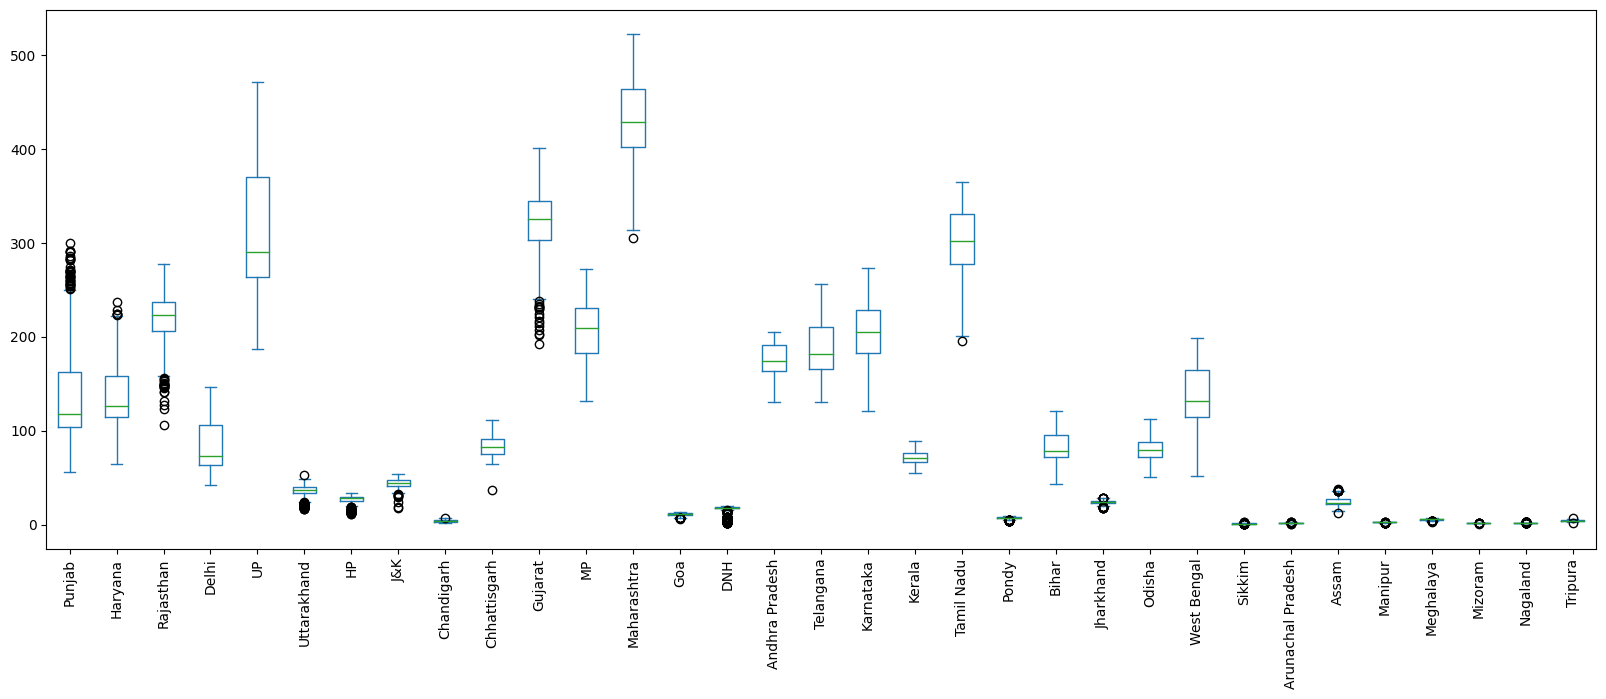

In [12]:
# boxplot по всему df
df.plot(kind='box', figsize=(20,7), rot=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c19ef274430>,
 'caps': [<matplotlib.lines.Line2D at 0x7c19ef22cca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c19ef274190>,
 'medians': [<matplotlib.lines.Line2D at 0x7c19ef274d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c19ef275030>,
 'means': []}

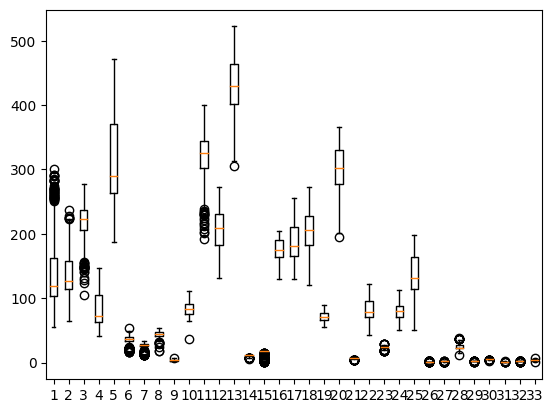

In [13]:
# или через plt
plt.boxplot(df)

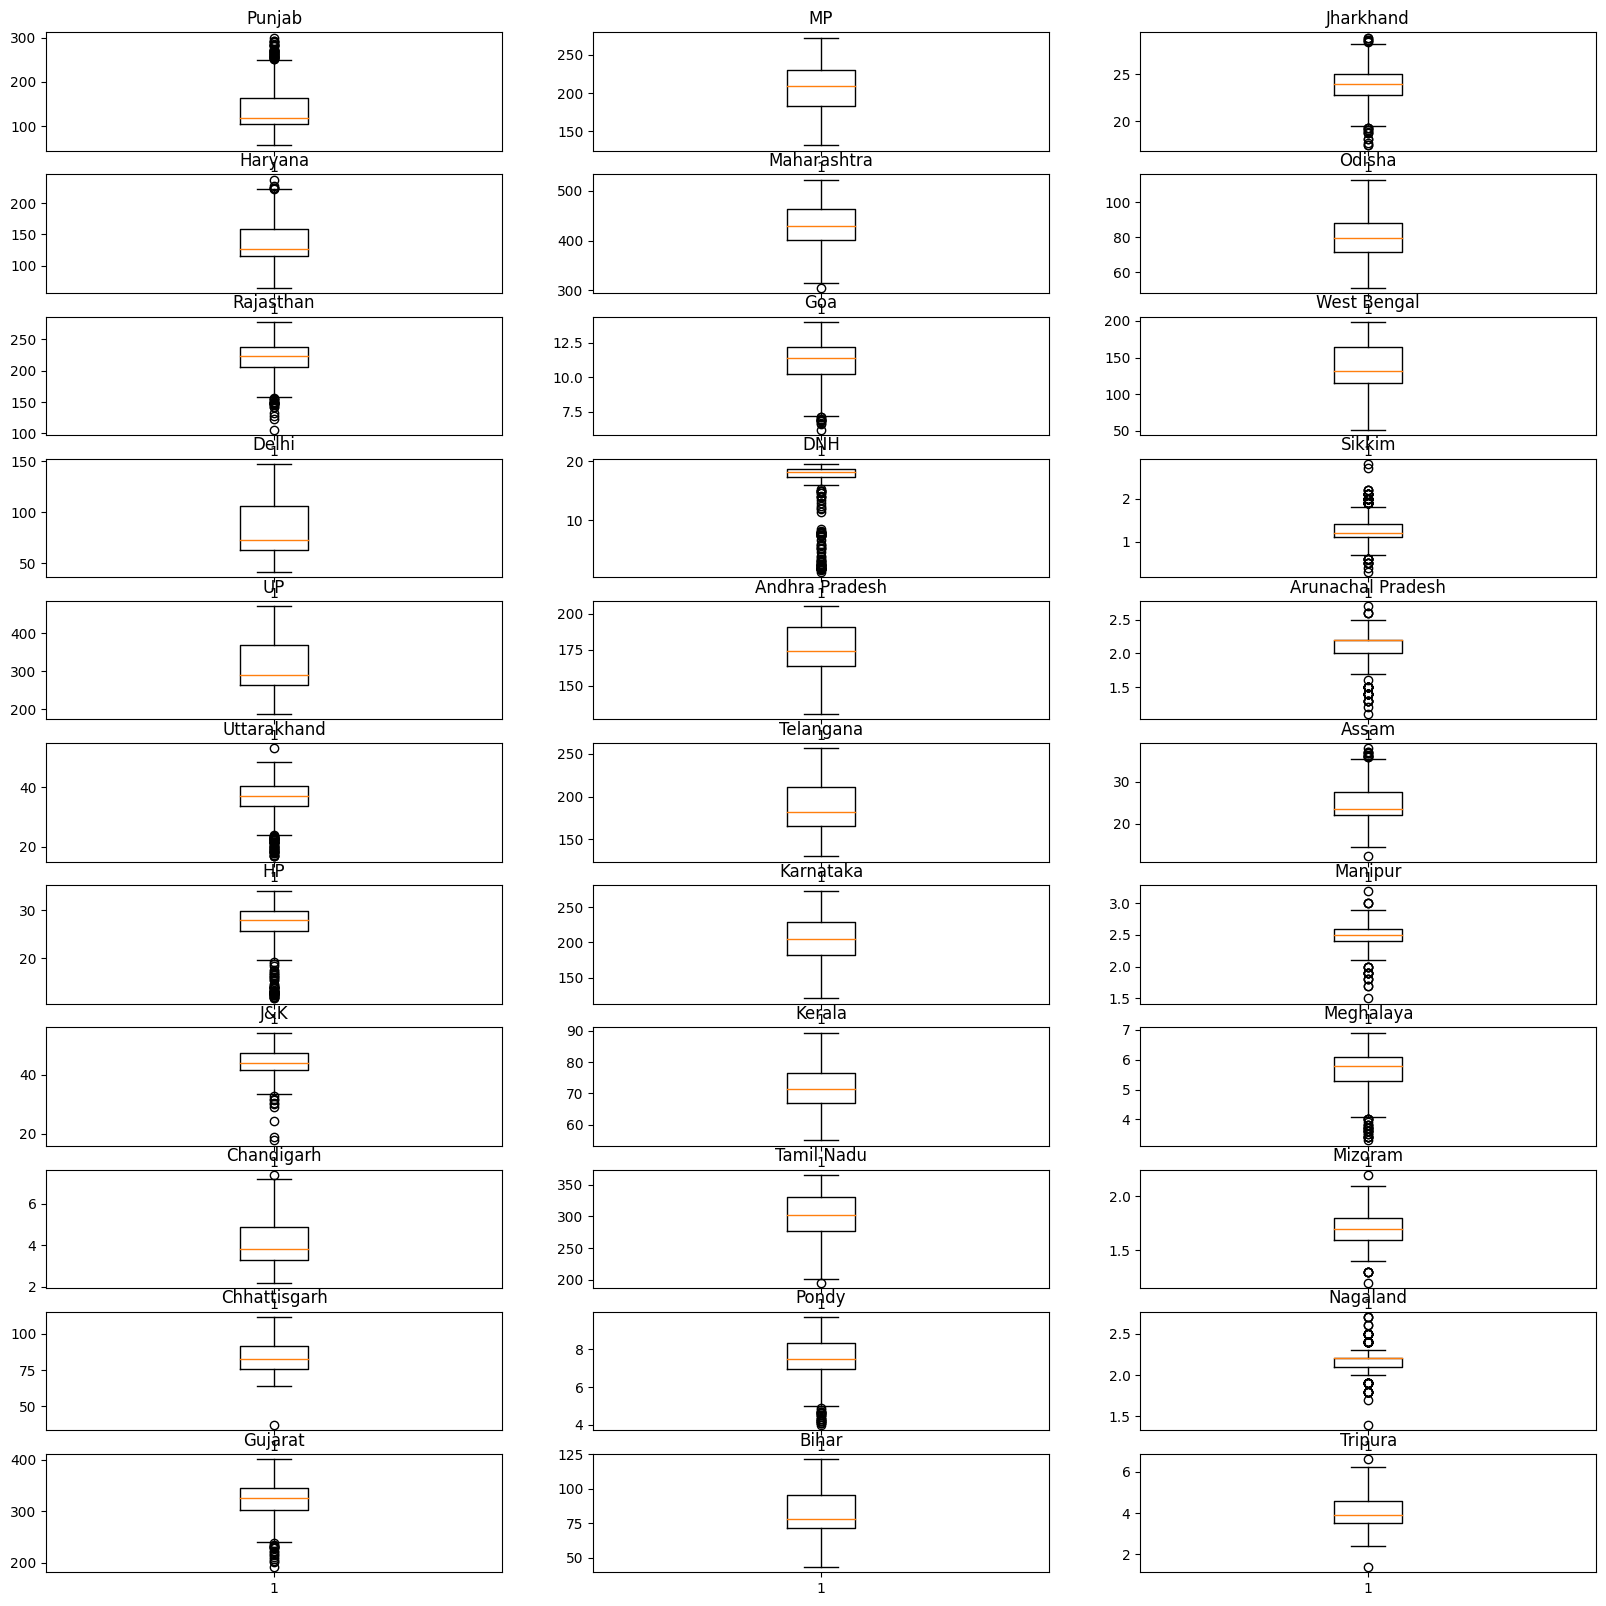

In [14]:
# смотрим все выбросы на одной figure
nrows = 11
ncols = 3
# создаём figure
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
for index in range(nrows * ncols):
  # по оси ординат - столбец df
  y = df.iloc[:, index]
  axes[index % nrows, index // nrows].set(title=df.columns[index])
  # коробчатая диаграмма
  axes[index % nrows, index // nrows].boxplot(y)
plt.show()

In [15]:
# анализировать не удобно

In [16]:
# разобъём df по диапазонам
mask_0_10 = df.max() < 10
index_0_10 = df.columns[mask_0_10]
df_0_10 = df[index_0_10]
mask_10_100 = (df.min() >= 10) & (df.max() < 100)
index_10_100 = df.columns[mask_10_100]
df_10_100 = df[index_10_100]
mask_100_1000 = (df.min() >= 100) & (df.max() < 1000)
index_100_1000 = df.columns[mask_100_1000]
df_100_1000 = df[index_100_1000]

<Axes: >

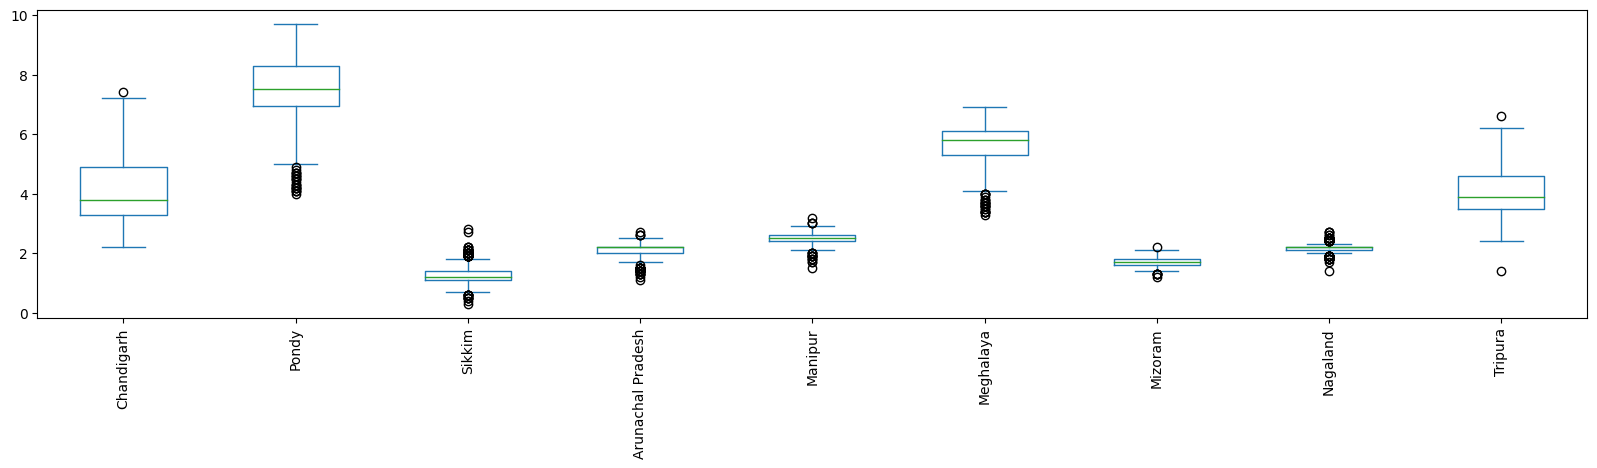

In [17]:
# df_0_10
df_0_10.plot(kind='box', figsize=(20,4), rot=90)
# Выбросы есть во всех столбцах. В столбцах Pondy, Sikkim, Meghalaya, Nagaland и Tripura выбросы существенные.

<Axes: >

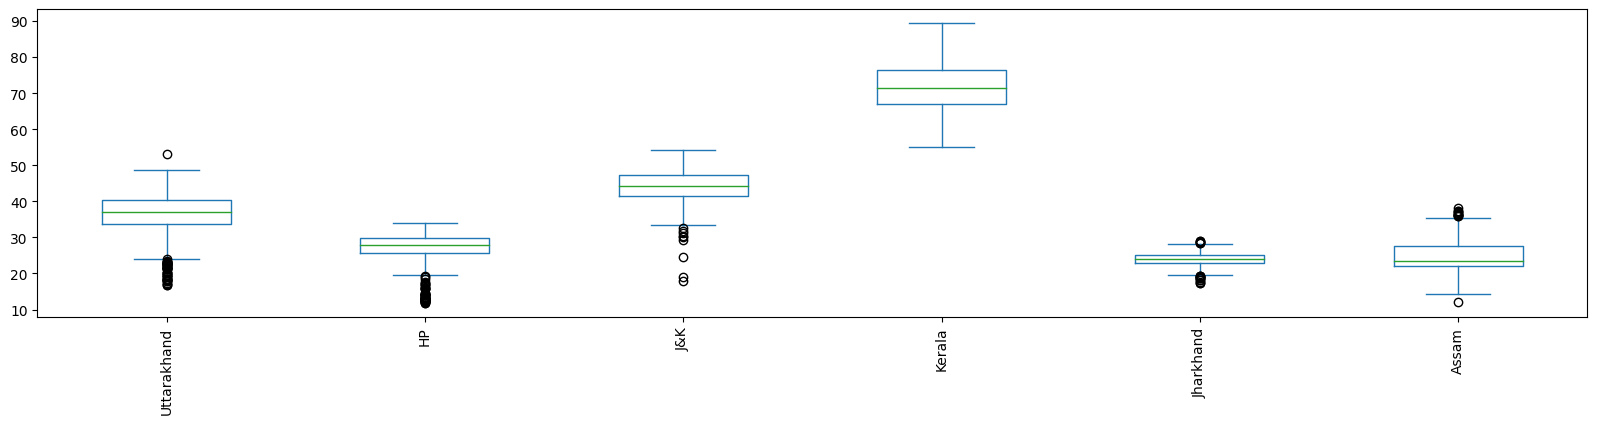

In [18]:
# df_10_100
df_10_100.plot(kind='box', figsize=(20,4), rot=90)
# Выбросы есть во всех столбцах, кроме Kerala. В столбцах Ultarakhand, HP, J&K выбросы существенные.

<Axes: >

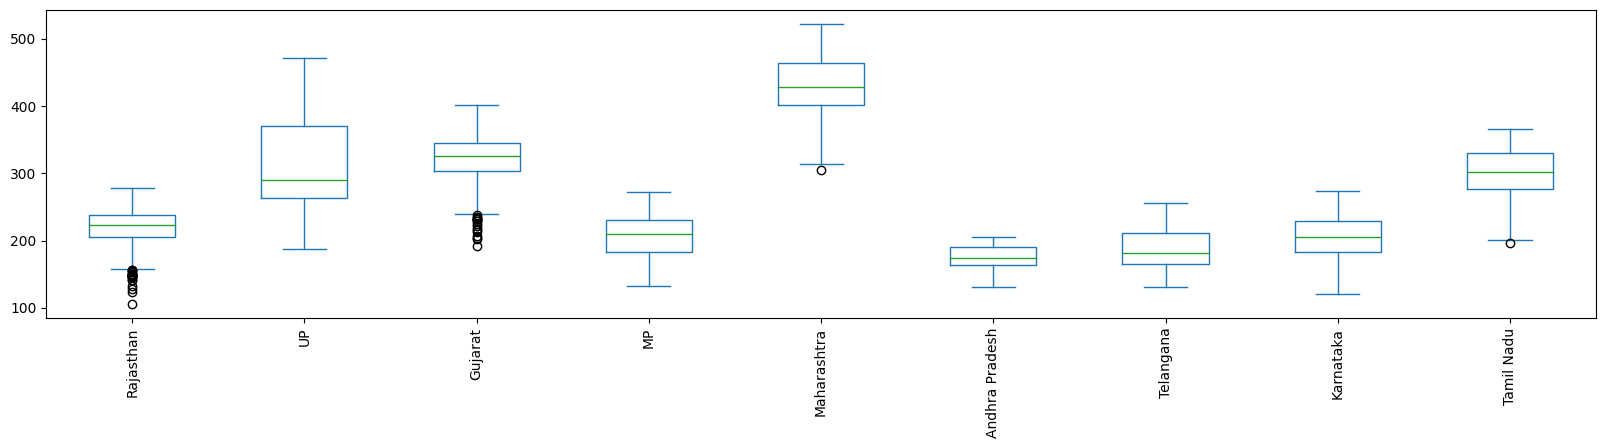

In [19]:
# df_100_1000
df_100_1000.plot(kind='box', figsize=(20,4), rot=90)
# Выбросы есть только в столбцах Rajasthan, Gujarat, Maharashtra и Tamil Nadu. В столбцах Rajasthan и Gujarat выбросы существенные.

In [20]:
# Выбросы при помощи scipy.stats
import scipy.stats as stats

# df отклонений кол-ва от std
df_scipy = df.apply(stats.zscore)

In [21]:
# Обработка выбросов:
# IQR (как на консультации)
# for column in df.columns:
#   iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
#   upper = df[column].mean() + 1.5 * iqr
#   lower = df[column].mean() - 1.5 * iqr
#   # строки с выбросами отбрасываются, данные в них теряются
#   df = df.loc[(df[column] >= lower) & (df[column] <= upper)]

# 3sigma (как на консультации)
# for column in df.columns:
#   upper = df[column].mean() + 3* df[column].std()
#   lower = df[column].mean() - 3* df[column].std()
#   # строки с выбросами отбрасываются, данные в них теряются
#   df = df.loc[(df[column] >= lower) & (df[column] <= upper)]

# Обрабатываем выбросы (для исключения потери в них даных значения с выбросами приравняем mean)
mask_z_score = abs(df_scipy) > 3
for col in df.columns:
  df[col].mask(mask_z_score[col], round(df[col].mean(), 1), inplace=True)
df

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-02,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,78.7,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
2019-01-03,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,78.8,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2019-01-04,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,74.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
2019-01-05,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,69.0,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
2019-01-06,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,68.1,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,100.4,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
2020-12-02,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,101.8,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
2020-12-03,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,103.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6


In [22]:
# разобъём df по диапазонам
mask_0_10 = df.max() < 10
index_0_10 = df.columns[mask_0_10]
df_0_10 = df[index_0_10]
mask_10_100 = (df.min() >= 10) & (df.max() < 100)
index_10_100 = df.columns[mask_10_100]
df_10_100 = df[index_10_100]
mask_100_1000 = (df.min() >= 100) & (df.max() < 1000)
index_100_1000 = df.columns[mask_100_1000]
df_100_1000 = df[index_100_1000]

<Axes: >

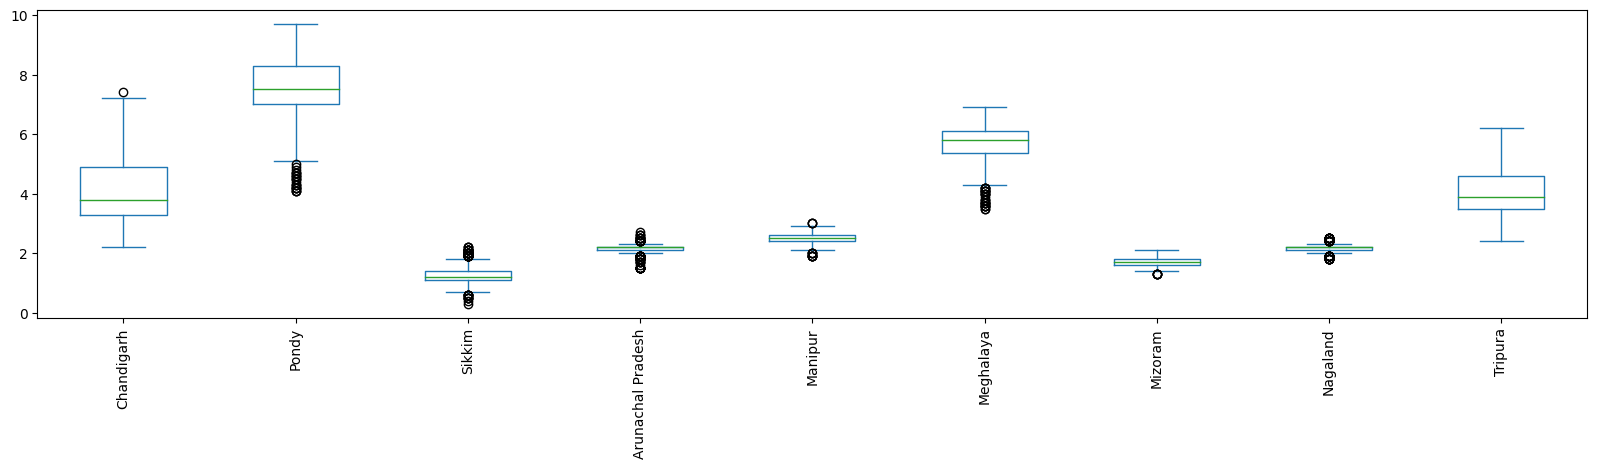

In [23]:
# df_0_10
df_0_10.plot(kind='box', figsize=(20,4), rot=90)

<Axes: >

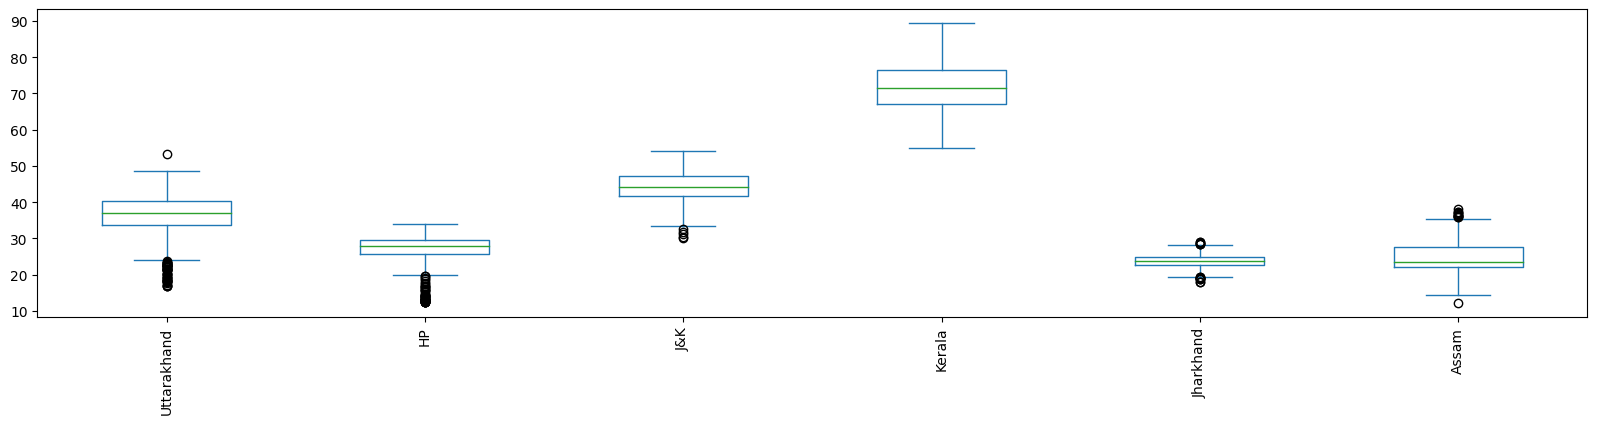

In [24]:
# df_10_100
df_10_100.plot(kind='box', figsize=(20,4), rot=90)

<Axes: >

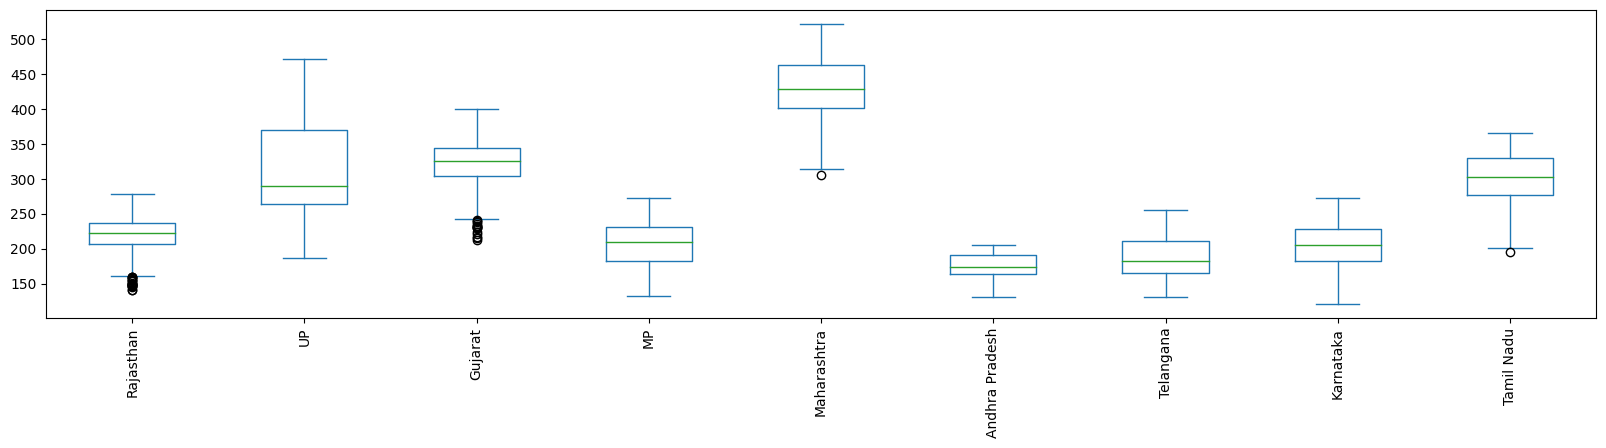

In [25]:
# df_100_1000
df_100_1000.plot(kind='box', figsize=(20,4), rot=90)

In [26]:
# после обработки выбросов
z_scores(df)

Столбец Punjab. Среднее значение = 141.1455268389662. Стандартное отклонение = 56.920694846950155. Выбросы (z-score > 3): Отсутствуют
Столбец Haryana. Среднее значение = 138.33359840954276. Стандартное отклонение = 38.06869489733839. Выбросы (z-score > 3): Отсутствуют
Столбец Rajasthan. Среднее значение = 219.2079522862823. Стандартное отклонение = 25.99030206773819. Выбросы (z-score > 3): Отсутствуют
Столбец Delhi. Среднее значение = 83.38071570576541. Стандартное отклонение = 25.88958290253991. Выбросы (z-score > 3): Отсутствуют
Столбец UP. Среднее значение = 314.03638170974153. Стандартное отклонение = 66.45080669313514. Выбросы (z-score > 3): Отсутствуют
Столбец Uttarakhand. Среднее значение = 36.157057654075544. Стандартное отклонение = 6.698439396498611. Выбросы (z-score > 3): Отсутствуют
Столбец HP. Среднее значение = 26.71351888667992. Стандартное отклонение = 4.57438369901197. Выбросы (z-score > 3): [12.7, 12.5, 12.6, 12.4, 12.5, 12.8, 12.9, 12.6, 12.8, 12.4, 12.6]
Столбец J&K

In [27]:
# Описательная статистика (после обработки выбросов)
df.describe()

,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,Chhattisgarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,...,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,141.145527,138.333598,219.207952,83.380716,314.036382,36.157058,26.713519,44.436581,4.141551,83.969980,...,80.464612,138.881511,1.283698,2.137575,24.960040,2.502584,5.670179,1.706362,2.160437,4.085885
std,56.977361,38.106593,26.016176,25.915357,66.516960,6.705108,4.578938,4.337102,1.143422,9.913464,...,10.905131,27.575293,0.351622,0.174350,4.732684,0.203391,0.672826,0.141278,0.130451,0.732879
min,56.100000,64.800000,141.300000,41.800000,186.800000,16.800000,12.400000,30.100000,2.200000,64.100000,...,51.100000,75.100000,0.300000,1.500000,12.200000,1.900000,3.500000,1.300000,1.800000,2.400000
25%,104.000000,114.800000,206.800000,63.500000,263.650000,33.800000,25.750000,41.600000,3.300000,75.750000,...,71.650000,114.750000,1.100000,2.100000,22.100000,2.400000,5.350000,1.600000,2.100000,3.500000
50%,118.300000,126.800000,222.900000,72.700000,290.000000,37.000000,28.000000,44.200000,3.800000,82.700000,...,79.800000,131.300000,1.200000,2.200000,23.500000,2.500000,5.800000,1.700000,2.200000,3.900000
75%,162.500000,158.100000,237.600000,105.800000,370.550000,40.350000,29.700000,47.350000,4.900000,91.600000,...,88.400000,164.750000,1.400000,2.200000,27.600000,2.600000,6.100000,1.800000,2.200000,4.600000
max,300.000000,237.200000,278.000000,147.100000,471.800000,53.200000,34.000000,54.200000,7.400000,111.600000,...,113.000000,198.500000,2.200000,2.700000,38.000000,3.000000,6.900000,2.100000,2.500000,6.200000


In [28]:
# Наблюдения

array([[<Axes: title={'center': 'Punjab'}>,
        <Axes: title={'center': 'Haryana'}>,
        <Axes: title={'center': 'Rajasthan'}>,
        <Axes: title={'center': 'Delhi'}>,
        <Axes: title={'center': 'UP'}>,
        <Axes: title={'center': 'Uttarakhand'}>],
       [<Axes: title={'center': 'HP'}>, <Axes: title={'center': 'J&K'}>,
        <Axes: title={'center': 'Chandigarh'}>,
        <Axes: title={'center': 'Chhattisgarh'}>,
        <Axes: title={'center': 'Gujarat'}>,
        <Axes: title={'center': 'MP'}>],
       [<Axes: title={'center': 'Maharashtra'}>,
        <Axes: title={'center': 'Goa'}>, <Axes: title={'center': 'DNH'}>,
        <Axes: title={'center': 'Andhra Pradesh'}>,
        <Axes: title={'center': 'Telangana'}>,
        <Axes: title={'center': 'Karnataka'}>],
       [<Axes: title={'center': 'Kerala'}>,
        <Axes: title={'center': 'Tamil Nadu'}>,
        <Axes: title={'center': 'Pondy'}>,
        <Axes: title={'center': 'Bihar'}>,
        <Axes: title={'cen

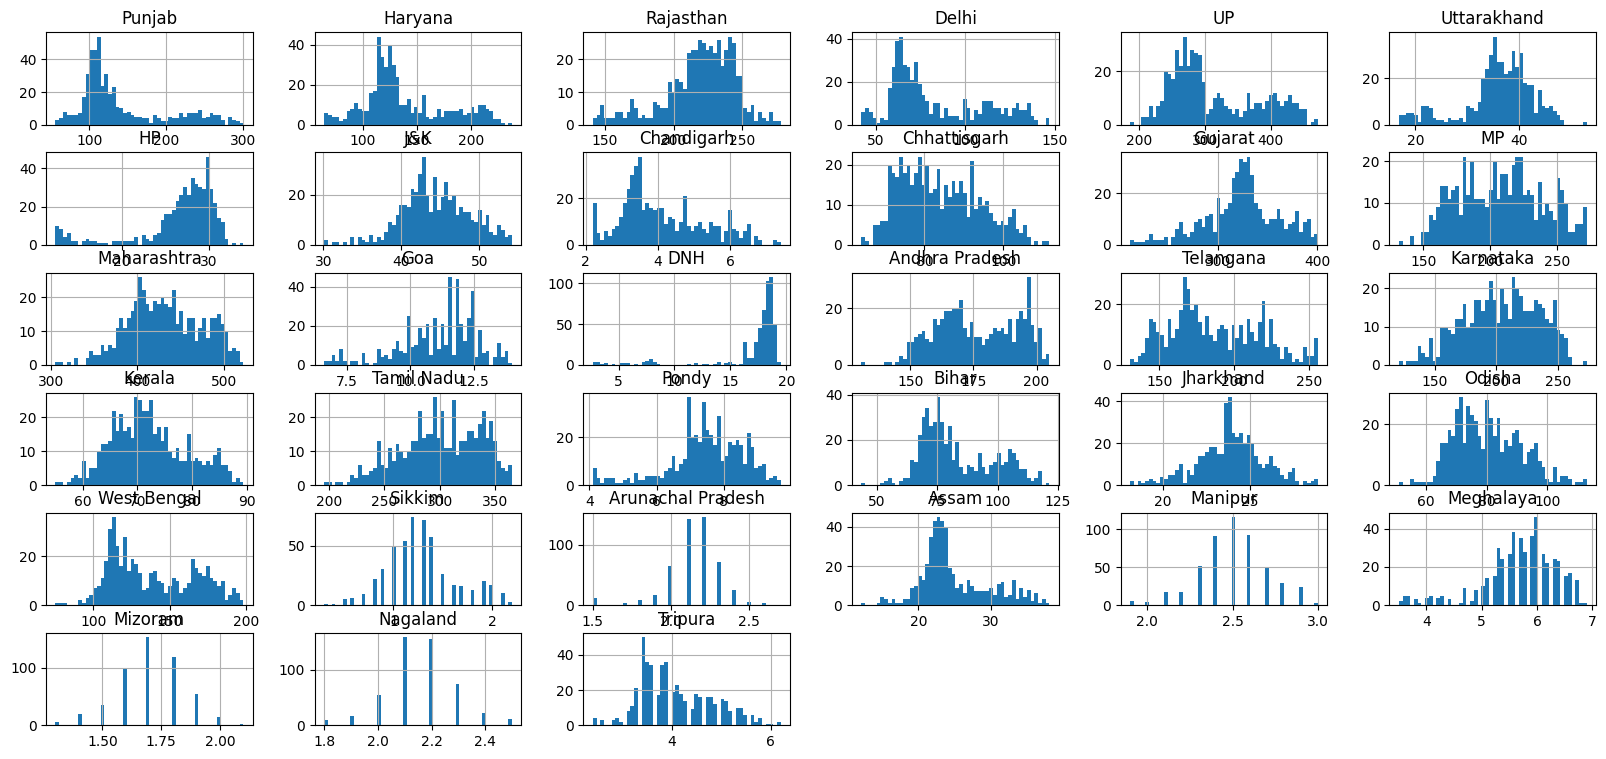

In [29]:
df.hist(bins=50, figsize=(20, 9))

In [30]:
# На гистограммах видно, что разброс данных по штатам Jharkhand, Manipur, Arunachal Pradesh, Mizoram и Nagaland похож на нормальное распределение.

In [31]:
# На гистограммах видно, что данные по штатам Sikkim, Arunachal Pradesh, Manipur, Meghalaya, Mizoram, Nagaland более дискретны, чем по остальным. Видимо, это связано с абсолютным значением измеряемой величины (до 10)
# и её округлением до 1 десятичного знака

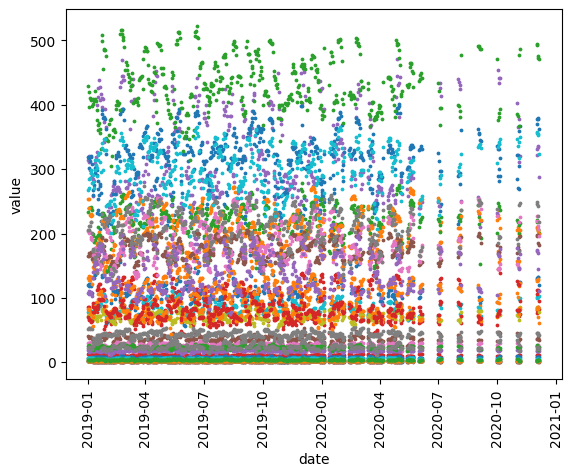

In [32]:
# Проверим распределение данных по времени (все штаты на одном графике)
# plt.title('Диаграмма рассеяния')
plt.xlabel('date')
plt.ylabel('value')
plt.xticks(rotation=90)
for column in df.columns:
  plt.scatter(x=df.index, y=df[column], s=3)
plt.show()

In [33]:
# На диаграммах рассеяния видно, что приблизительно до июня 2020 года данные собирались практически каждый день, однако затем вплоть до начала 2021 года было собрано лишь шесть порций данных (по несколько дней каждая).

In [34]:
# Проверим долю каждого штата

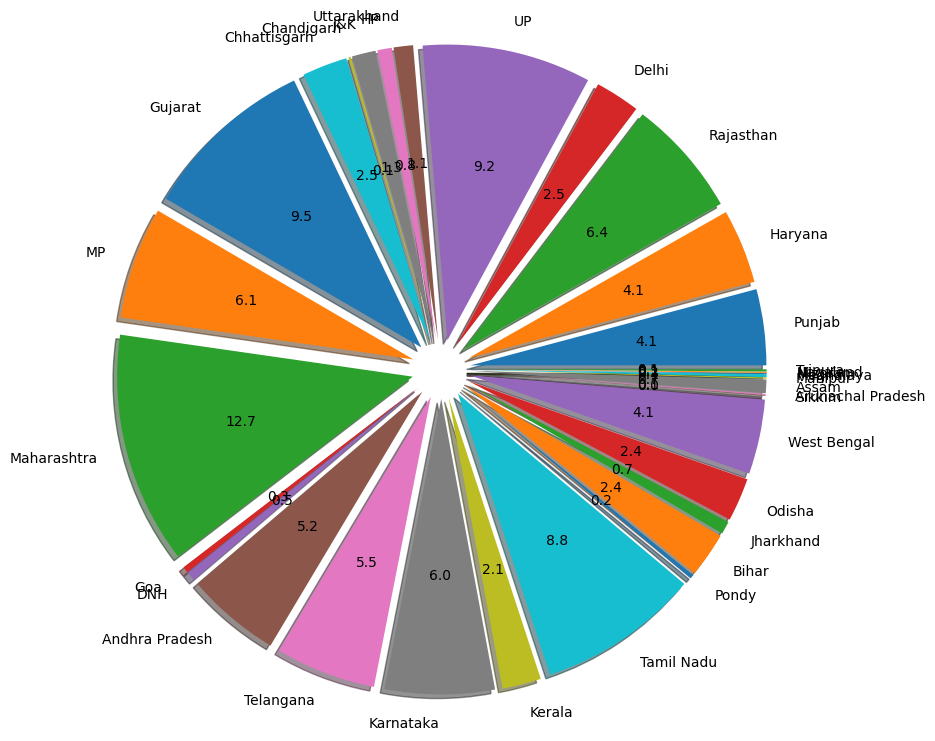

In [35]:
arr = df.sum()
plt.pie(x=arr, radius=2, labels=df.columns, explode=[0.2]*33, shadow=True, autopct='%.1f')
plt.show()

In [36]:
# На круговой диаграмме выделяется штат Maharashtra (доля 12.7 %) и штаты Gujarat (9.5%), UP (9.2%), Tamil Nadu (8.8%). Доля остальных намного меньше.

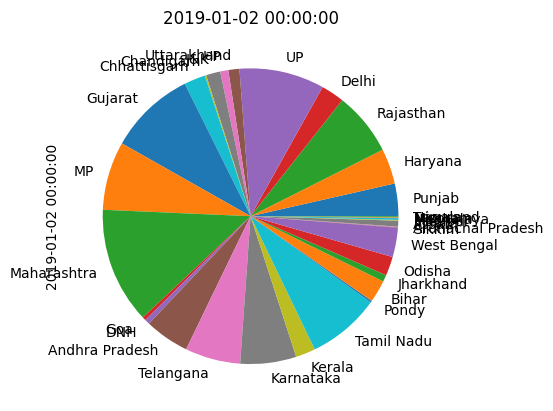

In [37]:
# можно сразу из df (за один день)
df_index = 0
df.iloc[df_index].plot.pie()
plt.title(df.index[df_index])
plt.show()

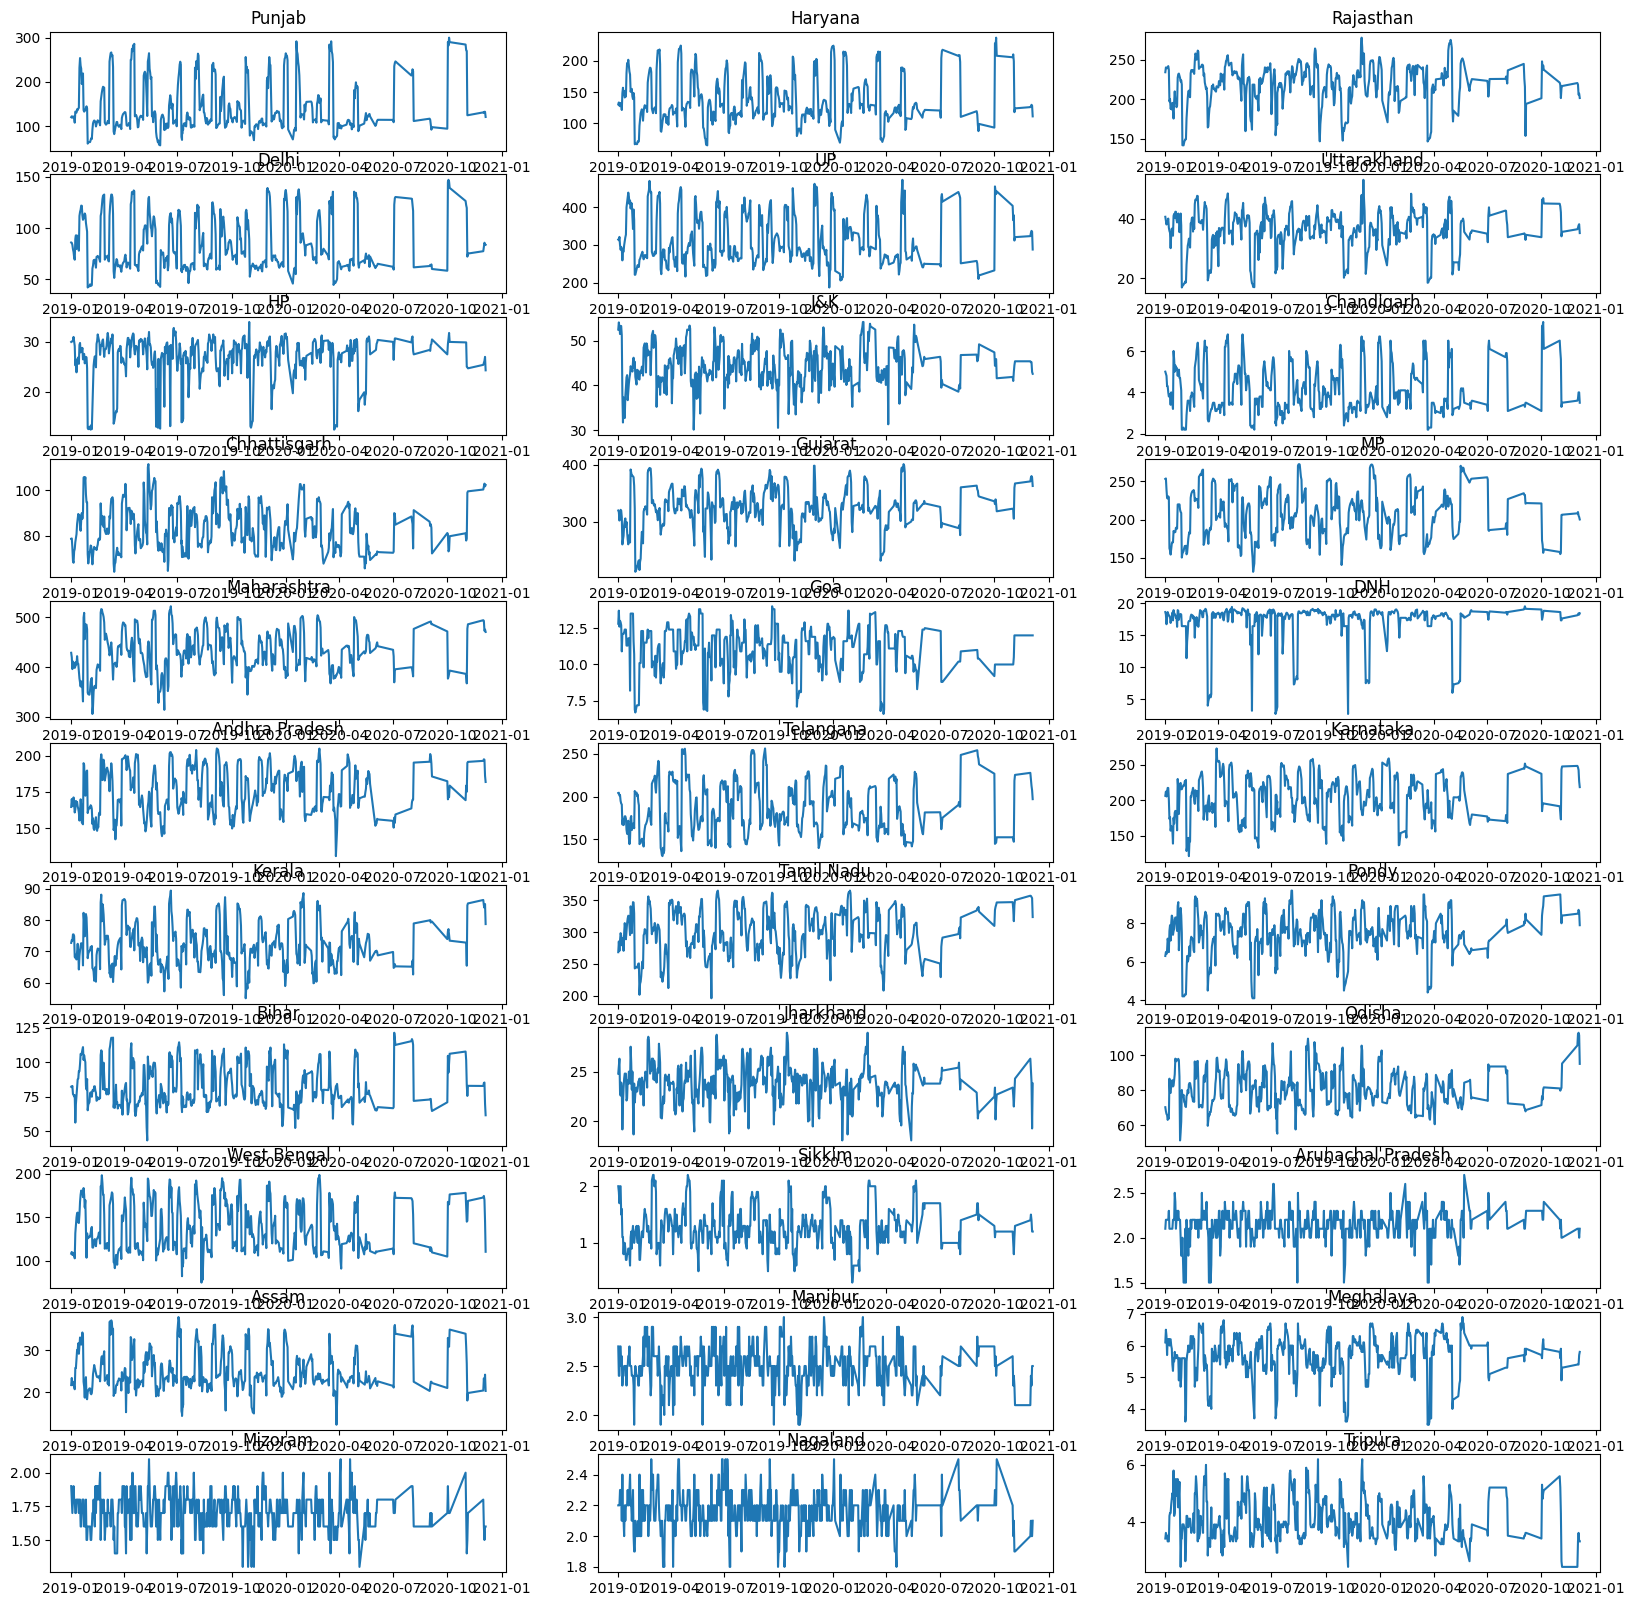

In [38]:
# Проверим распределение данных по времени (все штаты на одной figure)
nrows = 11
ncols = 3

plt.rcParams["figure.figsize"] = (20, 20)
for df_index in range(nrows * ncols):
  plt.subplot(nrows, ncols, df_index + 1)
  plt.plot(df.index, df.iloc[:, df_index])
  plt.title(df.columns[df_index])
plt.show()

In [39]:
# На графиках видно, что тенденция к увеличению/уменьшению значений показателя с течением времени отсутствует.